In [ ]:
outputfolder = '/Users/hkromer/polybox/Thesis/Chapters/Introduction/Figures/'
figname = 'xs_DD_and_DT'
import numpy as np
import pandas as pd
import matplotlib
import os
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

NameError: name 'props' is not defined

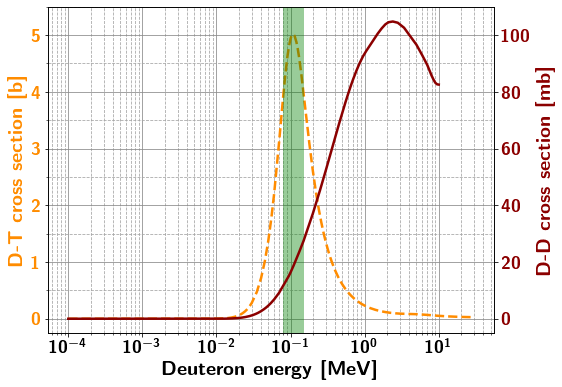

In [1]:
outputfolder = '/Users/hkromer/polybox/Thesis/Chapters/Introduction/Figures/'
figname = 'xs_DD_and_DT'
import numpy as np
import pandas as pd
import matplotlib
import os
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

# DD
data_DD = pd.read_csv('/Users/hkromer/02_PhD/02_Data/04.xs/xs_DD.dat', skiprows=10, delimiter=r'\s+')
data_DD = data_DD.iloc[:-2,0:2]
data_DD.columns = ['energy_MeV', 'xs_barn']
for col in data_DD.columns:
    data_DD[col] = data_DD[col].astype(float)
data_DD['xs_mb'] = data_DD['xs_barn'] * (1000) # barn to mbarn

# DT
data_DT = pd.read_csv('/Users/hkromer/02_PhD/02_Data/04.xs/xs_DT.dat', skiprows=10, delimiter=r'\s+')
data_DT = data_DT.iloc[:-2,0:2]
data_DT.columns = ['energy_MeV', 'xs_barn']
for col in data_DT.columns:
    data_DT[col] = data_DT[col].astype(float)
# PLOT
fig, ax1 = plt.subplots(figsize=(8, 6))

fs = 20
markersize = 8

colors = ['darkorange', 'darkred']
# D-D
p1=ax1.semilogx(data_DT['energy_MeV'].values, data_DT['xs_barn'].values, '--', color=colors[0], label='D-T', linewidth=2.5)

ax1.set_xlabel(r"\textbf{Deuteron energy [MeV]}", fontsize=fs)
ax1.set_ylabel(r"\textbf{D-T cross section [b]}", color=colors[0],fontsize=fs)
ax1.tick_params('x', colors='black', labelsize=fs-2)
ax1.tick_params(axis='y', labelcolor=colors[0], labelsize=fs-2)
# minor ticks x
# minor_locator = AutoMinorLocator(2)
# ax1.xaxis.set_minor_locator(minor_locator)
# minor ticks y
minor_locator = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator)
# ax1.set_xticks(np.arange(0,210,30))
# ax1.set_yticks(np.arange(0.5,2.5+0.5,0.5))
# leg1.set_title(r"\textbf{Deuterium ion energy [keV]}", prop = {'size': fs-4})
ax1.grid(which="minor",ls="--", color='0.65')
ax1.grid(which="major",ls="-", color='0.55')

ax1.set_ylim(-0.25,5.5)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
p2=ax2.semilogx(data_DD['energy_MeV'].values,data_DD['xs_mb'].values, '-', color=colors[1], label='D-D', linewidth=2.5)
ax2.set_ylabel(r"\textbf{D-D cross section [mb]}", color=colors[1],fontsize=fs)
ax2.tick_params(axis='y', labelcolor=colors[1], labelsize=fs-2)
ax2.set_ylim(-5,105+5)
E_fill = [0.08, 0.15] # deuteron energy range to fill in MeV
ax2.fill_between(E_fill, -20, 120, facecolor='green', alpha=0.4)
s = r'\textbf{Compact fast}' + '\n' + r'\textbf{neutron generators}'
ax2.text(0.16, 101, s, fontsize=14, color='green')

ps = p1+p2
labs = [p.get_label() for p in ps]
ax2.legend(ps, labs, loc='upper left', fontsize=fs-4)
plt.xlim(1e-2,2e1)
# ax1.grid(None)
plt.tight_layout()
plt.savefig(f'{outputfolder}{figname}/{figname}.pdf')
plt.show()

## Data from that fishy website to compare

In [ ]:
data_DD2 = pd.read_csv('/Users/hkromer/02_PhD/02_Data/04.xs/ddn.txt', skiprows=15, delimiter='\t')
data_DD2 = data_DD2.iloc[:,0:2]
data_DD2.columns = ['enery_MeV', 'xs_mb']
data_DD2['enery_MeV'] = data_DD2['enery_MeV'] * (1/1000) # keV to MeV
data_DD2['xs_mb'] = data_DD2['xs_mb'] * (1000) # barn to mbarn

plt.semilogx(data_DD2['enery_MeV'].values, data_DD2['xs_mb'].values)
plt.show()